In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fn_in = "../data/artificial_countries.parquet"

In [4]:
df_in = pd.read_parquet(fn_in)
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   dateTime     105120 non-null  datetime64[ns]
 1   demand       105120 non-null  float64       
 2   wind         105120 non-null  float64       
 3   solar        105120 non-null  float64       
 4   country      105120 non-null  object        
 5   wind_share   105120 non-null  float64       
 6   solar_share  105120 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.6+ MB


(0.0, 12.0)

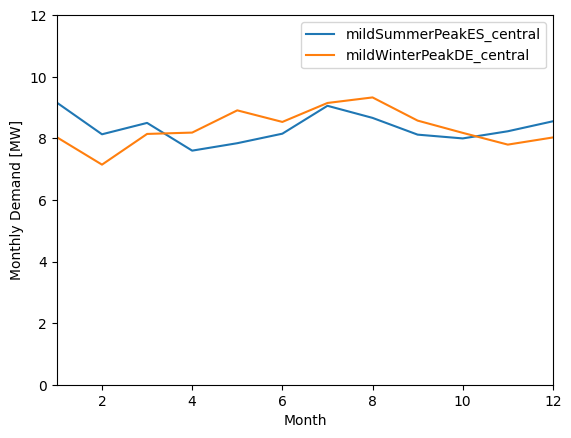

In [42]:
re_scen = "central"
c1 = "mildSummerPeakES"
c2 = "mildWinterPeakDE"
dem = 100

c1_full = f"{c1}_{re_scen}"
c2_full = f"{c2}_{re_scen}"

df_p = (
    df_in.query(f"country in {[c1_full, c2_full]}")
    .pivot_table("demand", "dateTime", "country")
)
# shift profile by the second country's by six month by creating an index that
# assigns the first half of the data to the second half of the year and vice
# versa
idx = list(df_p.index)
idx = idx[len(idx)//2:] + idx[:len(idx)//2]
df_ = pd.DataFrame(df_p[c2_full].values, index=idx, columns=[c2_full]).sort_index()
df_p = df_p.drop(columns=c2_full).join(df_)
df_p = df_p.groupby(lambda x: x.month).sum()

fig, ax = plt.subplots()
df_p.plot(ax=ax)
ax.set_ylabel("Monthly Demand [MW]")
ax.set_xlabel("Month")
ax.set_xlim(1,12)
ax.set_ylim(0,12)

(0.0, 12.0)

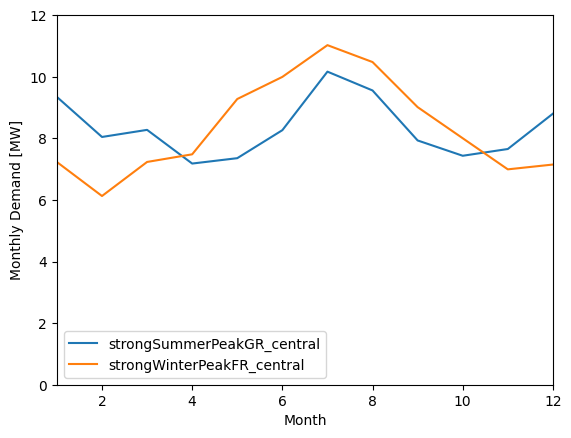

In [43]:
re_scen = "central"
c1 = "strongSummerPeakGR"
c2 = "strongWinterPeakFR"
dem = 100

c1_full = f"{c1}_{re_scen}"
c2_full = f"{c2}_{re_scen}"

df_p = (
    df_in.query(f"country in {[c1_full, c2_full]}")
    .pivot_table("demand", "dateTime", "country")
)
# shift profile by the second country's by six month by creating an index that
# assigns the first half of the data to the second half of the year and vice
# versa
idx = list(df_p.index)
idx = idx[len(idx)//2:] + idx[:len(idx)//2]
df_ = pd.DataFrame(df_p[c2_full].values, index=idx, columns=[c2_full]).sort_index()
df_p = df_p.drop(columns=c2_full).join(df_)
df_p = df_p.groupby(lambda x: x.month).sum()

fig, ax = plt.subplots()
df_p.plot(ax=ax)
ax.set_ylabel("Monthly Demand [MW]")
ax.set_xlabel("Month")
ax.set_xlim(1,12)
ax.set_ylim(0,12)